In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Carregando os dados do arquivo CSV (substitua 'dataset.csv' pelo caminho do seu arquivo)
data = pd.read_csv('dataset/users_answers.csv')

In [19]:
data.count()

user_id                    388742
answer_date                388742
answered_question_count    388742
approved                   388742
dtype: int64

In [3]:
def add_approved_column(dataset, answered_questions_to_be_approved):
    # Convertendo a coluna 'answer_date' para o tipo datetime
    dataset['answer_date'] = pd.to_datetime(dataset['answer_date'])
    
    # Extraindo o ano de 'answer_date' e armazenando em uma nova coluna 'year'
    dataset['year'] = dataset['answer_date'].dt.year
    
    # Agrupando o dataset por 'user_id' e 'year' e contando o número de respostas ('count')
    grouped = dataset.groupby(['user_id', 'year']).agg({'answered_question_count': 'sum'}).reset_index()
    
    # Criando a nova coluna 'approved' com base na condição de número de respostas
    grouped['approved'] = grouped['answered_question_count'] >= answered_questions_to_be_approved
    
    # Mesclando o resultado de volta ao dataset original
    result = pd.merge(dataset, grouped[['user_id', 'year', 'approved']], on=['user_id', 'year'], how='left')
    
    # Removendo a coluna 'year' adicionada temporariamente
    result.drop('year', axis=1, inplace=True)

     # Ordenando o DataFrame por 'user_id'
    result.sort_values(by=['answered_question_count','user_id'], ascending=False, inplace=True)
    
    return result

In [4]:
data = add_approved_column(data, 5000)

In [5]:
data.head()

,user_id,answer_date,answered_question_count,approved
30487,3015,2023-01-07,4317,True
160716,20900,2024-03-08,3829,False
11006,3015,2023-01-06,3520,True
47788,3015,2023-01-02,3296,True
23883,3015,2023-01-04,2626,True


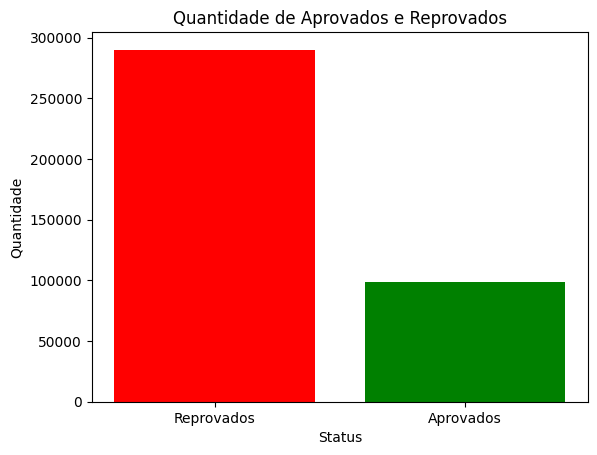

In [6]:
# Contagem de aprovados e reprovados
approved_counts = data['approved'].value_counts()

# Plotando o gráfico
plt.bar(['Reprovados', 'Aprovados'], approved_counts, color=['red', 'green'])
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Quantidade de Aprovados e Reprovados')
plt.show()

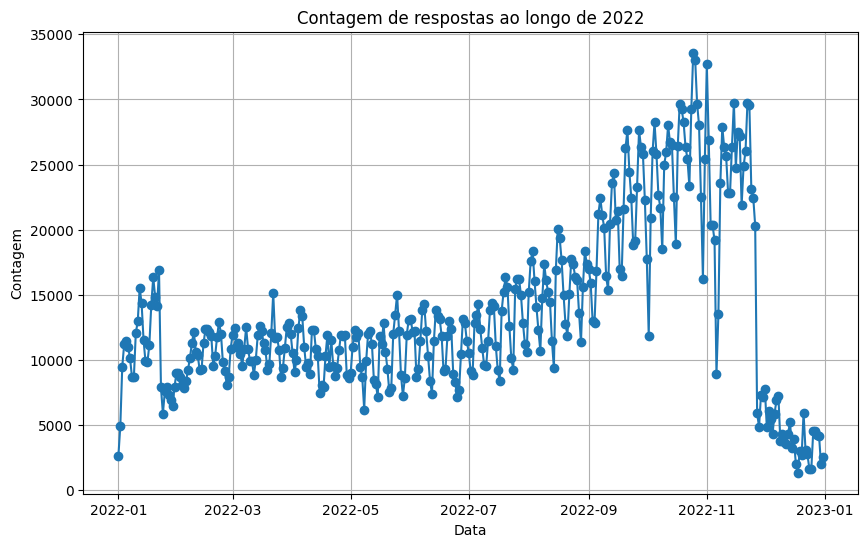

In [7]:
# Filtrar os dados para incluir apenas o ano de 2022
data_2022 = data[data['answer_date'].dt.year == 2022]

# Filtrar os dados para incluir apenas o ano de 2022
data_2022 = data[data['answer_date'].dt.year == 2022]

# Agrupar os dados por 'answer_date' e somar as contagens
data_grouped = data_2022.groupby('answer_date')['answered_question_count'].sum().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['answer_date'], data_grouped['answered_question_count'], marker='o', linestyle='-')
plt.title('Contagem de respostas ao longo de 2022')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [12]:
# Dividindo os dados em features (X) e rótulos (y)
X = data.drop(['approved', 'answer_date'], axis=1)  # Features
y = data['approved']  # Rótulos

In [13]:
# Dividindo os dados em conjuntos de treinamento e teste (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalizando os dados (padronizando os recursos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Inicializando e treinando o modelo de classificação (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test_scaled)

In [17]:

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)

In [18]:
# Exibinodo acurácia do modelo
print("Acurácia do modelo:", accuracy)

# Exibindo outras métricas de avaliação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Exibindo a matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia do modelo: 0.8988411426513524

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.94      0.92      0.93     58122
        True       0.78      0.84      0.81     19627

    accuracy                           0.90     77749
   macro avg       0.86      0.88      0.87     77749
weighted avg       0.90      0.90      0.90     77749


Matriz de Confusão:
[[53489  4633]
 [ 3232 16395]]
